In [21]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Name of the model
nome = "nosint-all"
model_dir = f"modelli/{nome}"

In [22]:
# Import validation data on the fine-tuning phase
try:
    with open(f"{model_dir}/val_loss_tune.txt", "r") as f:
        fineV_loss = [float(line.strip()) for line in f.readlines()]
        
    with open(f"{model_dir}/val_acc_tune.txt", "r") as f:
        fineV_acc = [float(line.strip()) for line in f.readlines()]
    
except:
    print("Fine-tuning data not found.")

In [23]:
# Import validation data on the training phase
try:
    with open(f"{model_dir}/val_loss.txt", "r") as f:
        val_loss = [float(line.strip()) for line in f.readlines()]
        
    with open(f"{model_dir}/val_acc.txt", "r") as f:
        val_acc = [float(line.strip()) for line in f.readlines()]
    
except:
    print("Validation data not found.")

## Plotting loss and accuracy during fine-tuning

[1.1969753503799438, 1.1645416021347046, 1.126293420791626, 1.1446919441223145, 1.1327835321426392, 1.1250615119934082, 1.0844035148620605, 1.1148104667663574, 1.0743589401245117, 1.091895580291748, 1.0398833751678467, 1.0051980018615723, 1.0016885995864868, 0.9938470721244812, 0.9786645174026489, 0.9627524614334106, 0.9677876234054565, 0.9691616892814636, 0.9756227135658264, 0.9695004820823669, 0.9653551578521729]


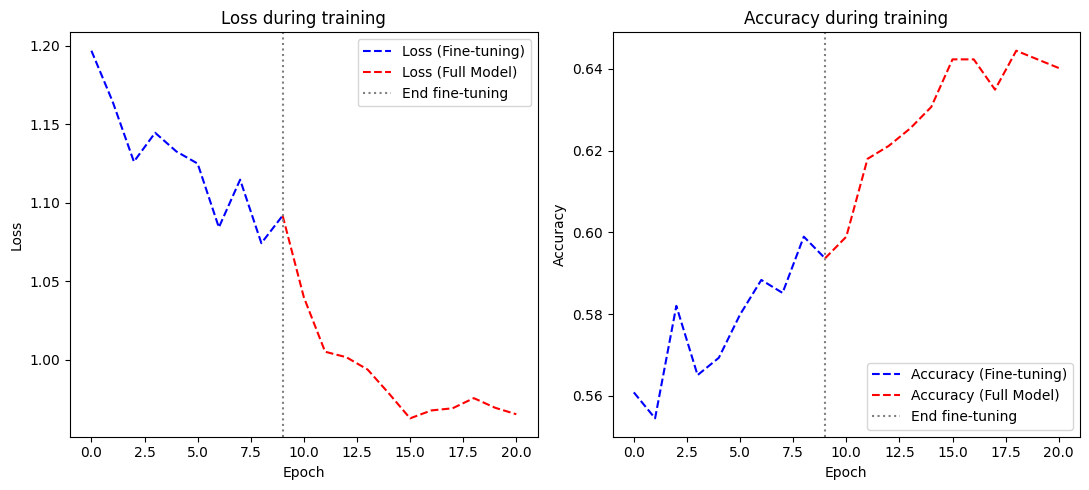

In [24]:
all_loss = fineV_loss + val_loss
all_acc = fineV_acc + val_acc
fig, ax = plt.subplots(1, 2, figsize=(11, 5))
print(all_loss)

# Epochs and split point
total_epochs = len(all_loss)
x = range(total_epochs)
split_point = len(fineV_loss)

# Loss plot
ax[0].plot(x[:split_point], all_loss[:split_point], color='blue', linestyle='--', label='Loss (Fine-tuning)')
ax[0].plot(x[split_point-1:], all_loss[split_point-1:], color='red', linestyle='--', label='Loss (Full Model)')

# Vertical line
ax[0].axvline(x=split_point-1, color='gray', linestyle=':', label='End fine-tuning')

# Labels and title
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss during training')
ax[0].legend()

# Accuracy plot
ax[1].plot(x[:split_point], all_acc[:split_point], color='blue', linestyle='--', label='Accuracy (Fine-tuning)')
ax[1].plot(x[split_point-1:], all_acc[split_point-1:], color='red', linestyle='--', label='Accuracy (Full Model)')

# Vertical line
ax[1].axvline(x=split_point-1, color='gray', linestyle=':', label='End fine-tuning')

# Labels and title
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy during training')
ax[1].legend()

fig.tight_layout()
plt.show()

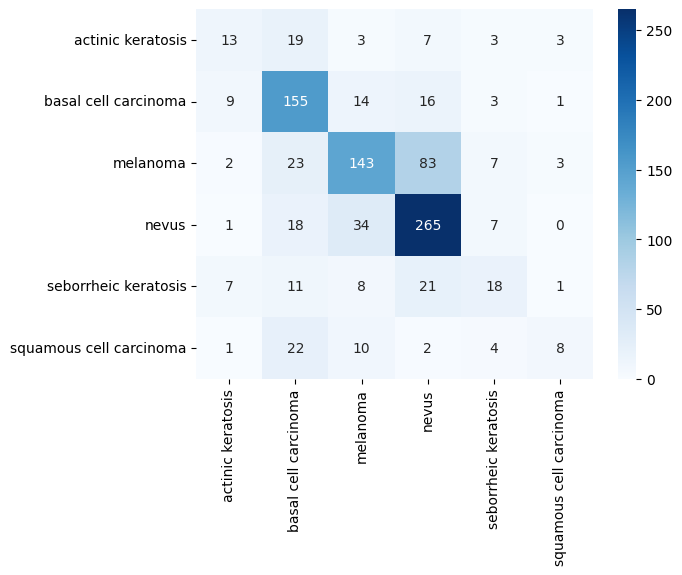

In [25]:
# Get confusion matrix
confusion_matrix_data = np.array(
    [[ 13,  19,   3,   7,   3,   3],
     [  9, 155,  14,  16,   3,   1],
     [  2,  23, 143,  83,   7,   3],
     [  1,  18,  34, 265,   7,   0],
     [  7,  11,   8,  21,  18,   1],
     [  1,  22,  10,   2,   4,   8]]
)

# Classes in the correct order
class_labels = [
    'actinic keratosis',
    'basal cell carcinoma',
    'melanoma',
    'nevus',
    'seborrheic keratosis',
    'squamous cell carcinoma'
]

# Plot heatmap
plt.figure()
sns.heatmap(confusion_matrix_data, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.show()